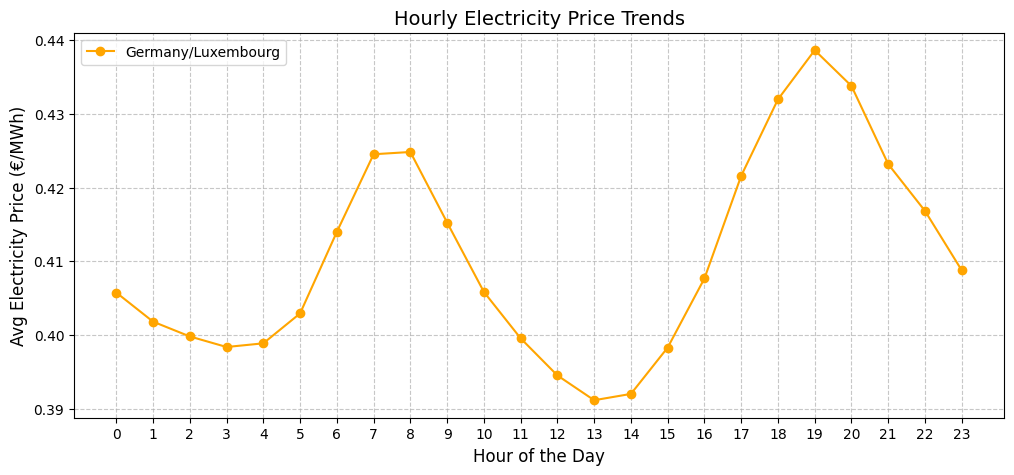

✅ Plot saved: c:\Users\Elite\Documents\Ocean\PowerCast The Electricity Price Forecasting Challenge\03_GridWise-Predictor\notebooks\..\visualizations\hourly_price_analysis.png


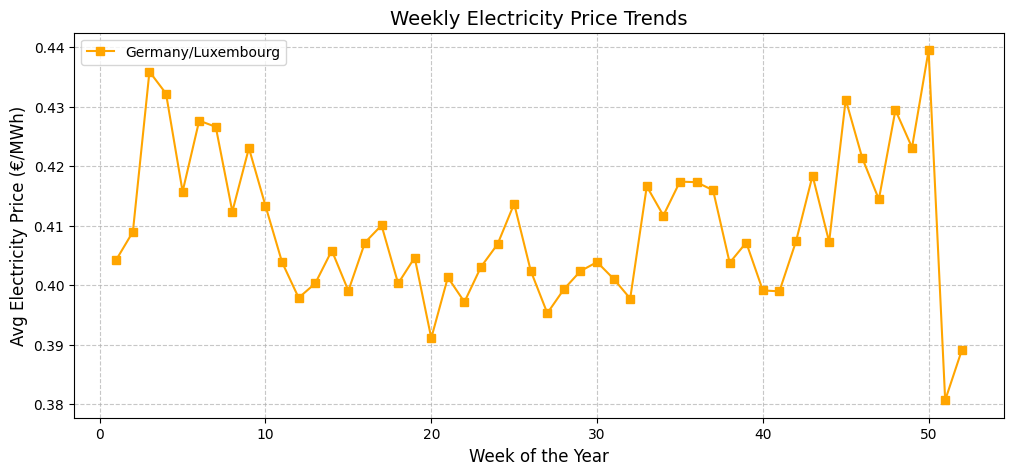

✅ Plot saved: c:\Users\Elite\Documents\Ocean\PowerCast The Electricity Price Forecasting Challenge\03_GridWise-Predictor\notebooks\..\visualizations\weekly_price_analysis.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# =========================
# 📌 Define Paths
# =========================
BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, "../data/transformed")
PLOTS_DIR = os.path.join(BASE_DIR, "..", "visualizations")
os.makedirs(PLOTS_DIR, exist_ok=True)  # Ensure visualizations directory exists

# =========================
# 📌 Load & Prepare Data
# =========================
file_path = os.path.join(DATA_DIR, "transformed_refined_Day-ahead_prices_202301010000_202503050000_Hour.csv")
df = pd.read_csv(file_path, delimiter=",", low_memory=False)

# Convert time column to datetime format
df["Start date"] = pd.to_datetime(df["Start date"])

# Extract time-based features
df["Hour"] = df["Start date"].dt.hour
df["Week"] = df["Start date"].dt.isocalendar().week.astype(int)

# Ensure the price column is numeric
price_col = "Germany/Luxembourg [€/MWh] Original resolutions"
df[price_col] = pd.to_numeric(df[price_col], errors="coerce")

# Drop NaN values for reliable analysis
df = df.dropna(subset=[price_col])

# Compute average electricity prices per hour and per week
hourly_prices = df.groupby("Hour")[price_col].mean()
weekly_prices = df.groupby("Week")[price_col].mean().sort_index()

# =========================
# 📌 Hourly Electricity Price Trends
# =========================
hourly_plot_filename = "hourly_price_analysis.png"
plt.figure(figsize=(12, 5))
plt.plot(hourly_prices.index, hourly_prices, label="Germany/Luxembourg", color="orange", marker="o")
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Avg Electricity Price (€/MWh)", fontsize=12)
plt.title("Hourly Electricity Price Trends", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(range(0, 24))
plt.savefig(os.path.join(PLOTS_DIR, hourly_plot_filename), dpi=300, bbox_inches="tight")
plt.show()
plt.close()
print(f"✅ Plot saved: {os.path.join(PLOTS_DIR, hourly_plot_filename)}")

# =========================
# 📌 Weekly Electricity Price Trends
# =========================
weekly_plot_filename = "weekly_price_analysis.png"
plt.figure(figsize=(12, 5))
plt.plot(weekly_prices.index, weekly_prices, label="Germany/Luxembourg", color="orange", marker="s")
plt.xlabel("Week of the Year", fontsize=12)
plt.ylabel("Avg Electricity Price (€/MWh)", fontsize=12)
plt.title("Weekly Electricity Price Trends", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.savefig(os.path.join(PLOTS_DIR, weekly_plot_filename), dpi=300, bbox_inches="tight")
plt.show()
plt.close()
print(f"✅ Plot saved: {os.path.join(PLOTS_DIR, weekly_plot_filename)}")
